In [1]:
using Alice

# import Pkg
# Pkg.add("PyPlot")
import PyPlot
const plt = PyPlot
# pygui(true) # window plots

using BenchmarkTools: @benchmark

# import Pkg
# Pkg.add("Random")
using Random: Xoshiro
rng = Xoshiro(42);

# Simple mesh

In [2]:
points = [3 3; -5 -2; 3 -5; 1 -4; 2 -2; -5 4; 1 -5; -2 -3; -4 -3; 3 1]
pts = matrix_to_nodes(points)

dt = simple_delaunay(pts)

dt_circles = export_circles(dt)
dt_dtris = export_triangles(dt)
dt_all_dns, dt_all_dtris = export_extended_dt(dt)
vn, vr = export_voronoi_regions(dt)

dt_tris = export_nodes(dt_dtris, offset=1)
dt_all_ns = export_nodes(dt_all_dns)
dt_all_tris = export_nodes(dt_all_dtris, offset=1)
rawvn = export_nodes(vn);

In [3]:
@benchmark simple_delaunay($pts)

BenchmarkTools.Trial: 9339 samples with 1 evaluation.
 Range (min … max):  416.771 μs …   9.674 ms  ┊ GC (min … max): 0.00% … 90.08%
 Time  (median):     454.622 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   531.222 μs ± 456.841 μs  ┊ GC (mean ± σ):  6.16% ±  6.83%

  ▂▃█▇▆▅▄▃▃▂▂▂▁▁▁▂▁▁▁▁                                          ▂
  █████████████████████▇▇█▇▇▇▇▆▇▇▇▇▇▇▆▇▇████▇▇▆▆▇▆▅▅▅▅▃▅▄▄▅▆▇▇▆ █
  417 μs        Histogram: log(frequency) by time       1.04 ms <

 Memory estimate: 253.55 KiB, allocs estimate: 4879.

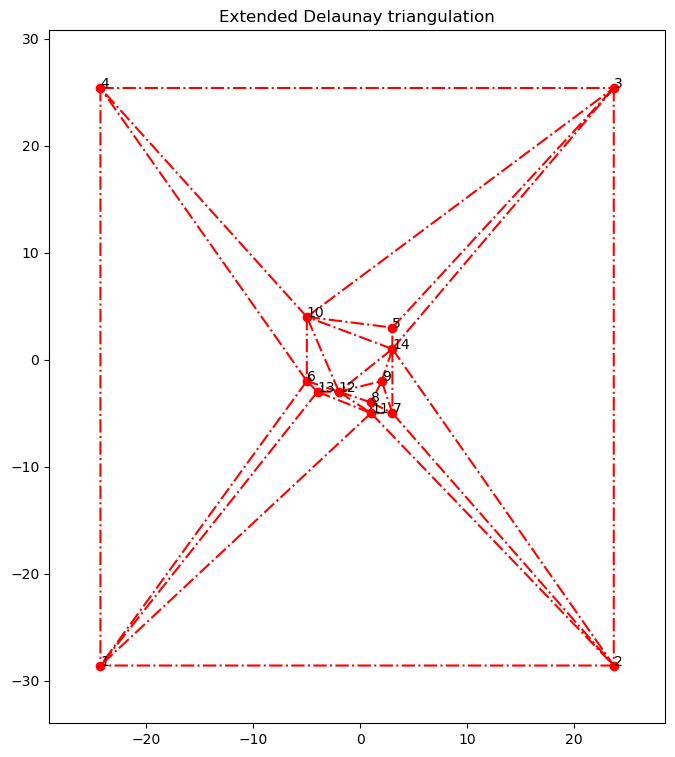

In [4]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.margins(0.1)
ax.set_aspect("equal")
# remove dt_all_tris to see Delaunay triangulation that is made by matplotlib (should be the same)
ax.triplot(plt.matplotlib.tri.Triangulation(dt_all_ns[:, 1], dt_all_ns[:, 2], dt_all_tris), "ro-.")
plt.title("Extended Delaunay triangulation")

for i = axes(dt_all_ns, 1)
    plt.annotate(i, xy=dt_all_ns[i, :])
end

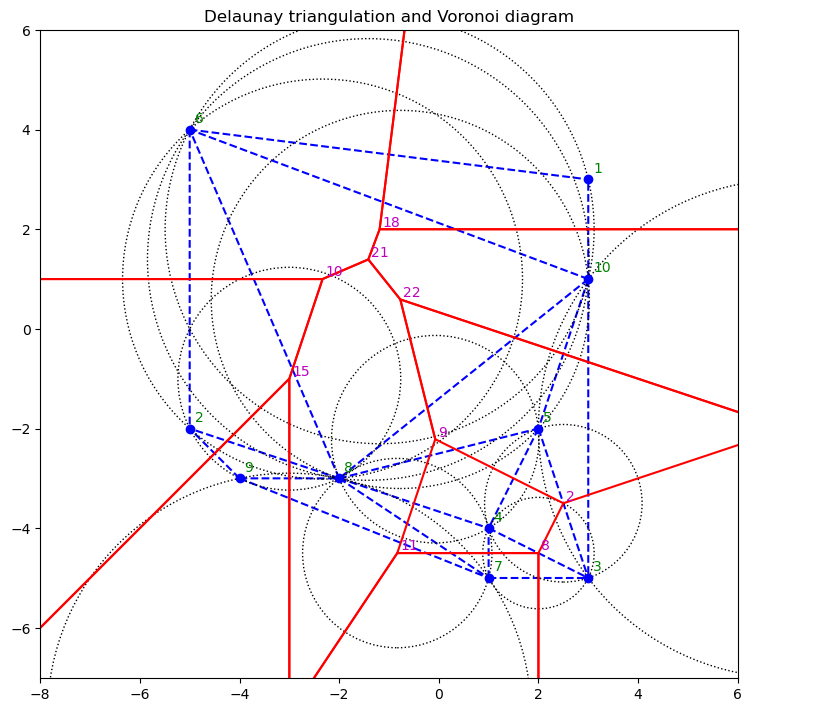

In [5]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.margins(0.1)
ax.set_aspect("equal")
plt.axis([-8, 6, -7, 6])
# remove dt_tris to see Delaunay triangulation that is made by matplotlib (should be the same)
ax.triplot(plt.matplotlib.tri.Triangulation(points[:, 1], points[:, 2], dt_tris), "bo--")
plt.title("Delaunay triangulation and Voronoi diagram")

for i = axes(points, 1)
    plt.annotate(i, xy=points[i, :], xytext=(5, 7), textcoords="offset pixels", color="g")
end

for c in dt_circles
    cxcy, r = Alice.ccr_tuples(c)
    ax.add_artist(plt.matplotlib.patches.Circle(cxcy, r, color="k", fill=false, ls="dotted"))
end

for (r, _) in vr
    # Build polygon for each region.
    polygon = rawvn[vr[r], :]
    # Plot polygon edges in red.
    plt.plot(polygon[:, 1], polygon[:, 2], color="red")
end

for i = axes(rawvn, 1)
    if all(coord -> abs(coord) < 8, rawvn[i, :])
        plt.annotate(i, xy=rawvn[i, :], xytext=(3, 3), textcoords="offset pixels", color="m")
    end
end

# "Real" mesh

In [6]:
# 1) fails if there are points on the boundary (SingularException)
# 2) breaks if there are more than 10 points on the cylinder (BoundsError)
points = generate_cyl_points(0, 1000, 10)
pts = matrix_to_nodes(transpose(points))

dt = simple_delaunay(pts)

dt_dtris = export_triangles(dt)
vn, vr = export_voronoi_regions(dt)

dt_tris = export_nodes(dt_dtris, offset=1)
rawvn = export_nodes(vn);

Deleted 8 points.


In [7]:
@benchmark simple_delaunay($pts)

BenchmarkTools.Trial: 6 samples with 1 evaluation.
 Range (min … max):  903.336 ms … 932.082 ms  ┊ GC (min … max): 5.82% … 5.69%
 Time  (median):     915.180 ms               ┊ GC (median):    5.77%
 Time  (mean ± σ):   917.322 ms ±  10.797 ms  ┊ GC (mean ± σ):  5.80% ± 0.42%

  █             █         ██                          █       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁█ ▁
  903 ms           Histogram: frequency by time          932 ms <

 Memory estimate: 361.62 MiB, allocs estimate: 11485257.

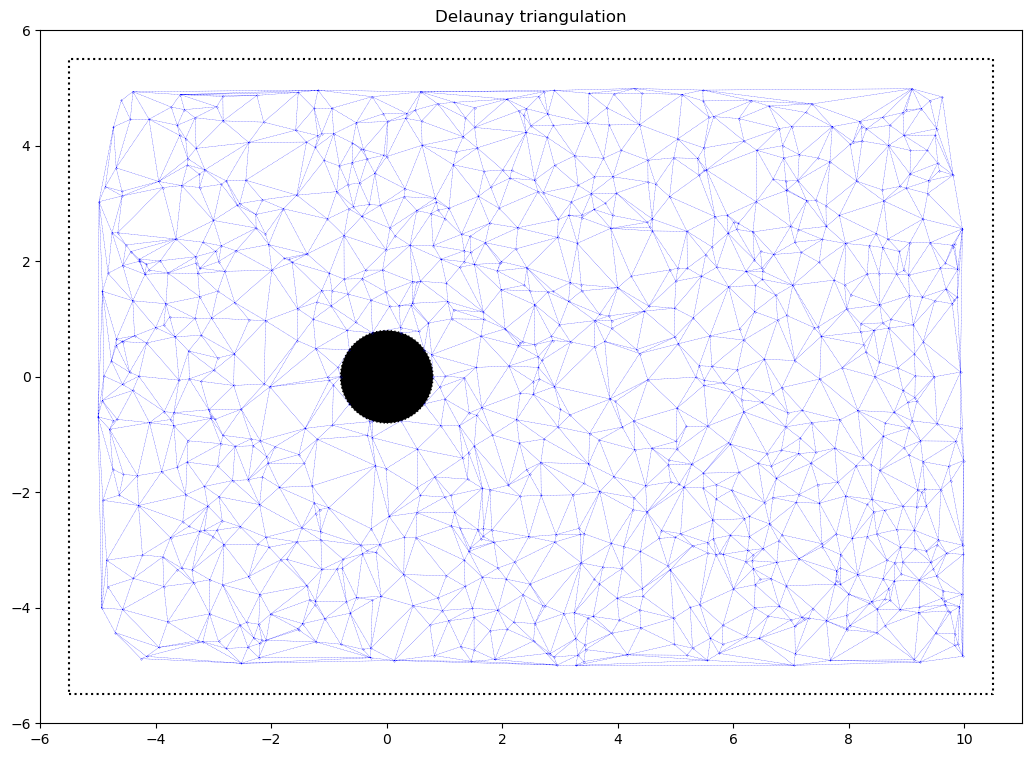

In [8]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.margins(0.1)
ax.set_aspect("equal")
plt.axis([-6, 11, -6, 6])
# remove dt_tris to see Delaunay triangulation that is made by matplotlib (should be the same)
ax.triplot(plt.matplotlib.tri.Triangulation(points[1, :], points[2, :], dt_tris), "bo--", markersize=0.2, linewidth=0.2)
plt.title("Delaunay triangulation")

ax.add_artist(plt.matplotlib.patches.Circle((0, 0), 0.8, color="k", fill=true, ls="dotted"))

plt.plot([-5.5, 10.5, 10.5, -5.5, -5.5], [-5.5, -5.5, 5.5, 5.5, -5.5], color="k", ls="dotted");

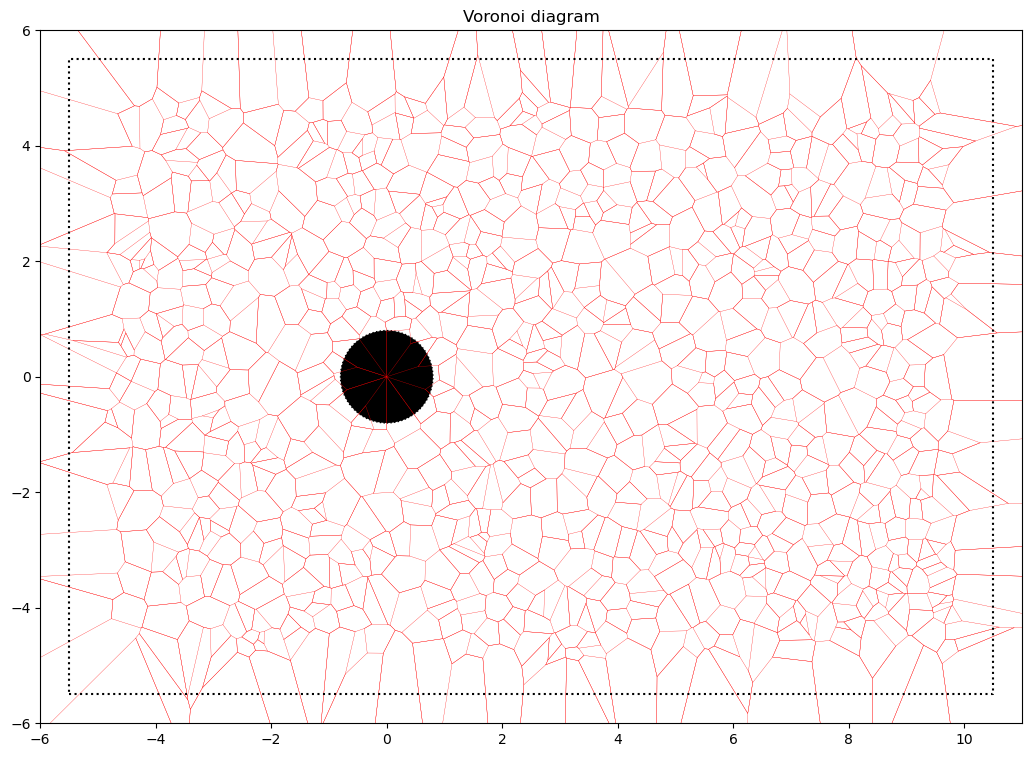

In [9]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.margins(0.1)
ax.set_aspect("equal")
plt.axis([-6, 11, -6, 6])
plt.title("Voronoi diagram")

for (r, _) in vr
    # Build polygon for each region.
    polygon = rawvn[vr[r], :]
    # Plot polygon edges in red.
    plt.plot(polygon[:, 1], polygon[:, 2], color="red", linewidth=0.2)
end

ax.add_artist(plt.matplotlib.patches.Circle((0, 0), 0.8, color="k", fill=true, ls="dotted"))

plt.plot([-5.5, 10.5, 10.5, -5.5, -5.5], [-5.5, -5.5, 5.5, 5.5, -5.5], color="k", ls="dotted");

# Benchmark

In [10]:
size = 3_000
points = rand(rng, 2, size) .* size .* 100
@assert length(unique(points)) == 2 * size

pts = matrix_to_nodes(transpose(points))

dt = simple_delaunay(pts)

dt_dtris = export_triangles(dt)
vn, vr = export_voronoi_regions(dt)

dt_tris = export_nodes(dt_dtris, offset=1)
rawvn = export_nodes(vn);

In [11]:
@benchmark simple_delaunay($pts)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 7.981 s (5.66% GC) to evaluate,
 with a memory estimate of 3.02 GiB, over 100329741 allocations.

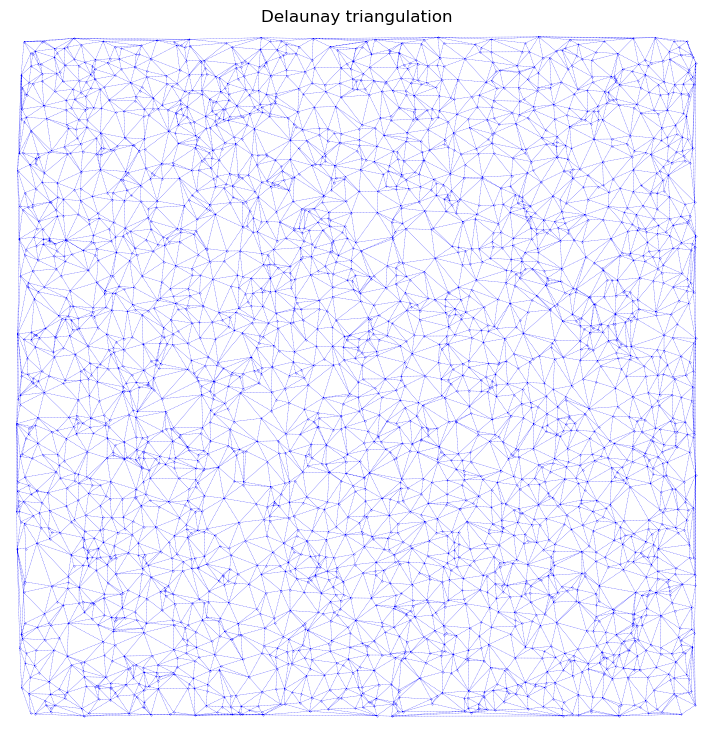

In [12]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.margins(0.1)
ax.set_aspect("equal")
# remove dt_tris to see Delaunay triangulation that is made by matplotlib (should be the same)
ax.triplot(plt.matplotlib.tri.Triangulation(points[1, :], points[2, :], dt_tris), "bo--", markersize=0.2, linewidth=0.2)
plt.title("Delaunay triangulation")
plt.axis([-size, 101 * size, -size, 101 * size])
plt.axis("off");

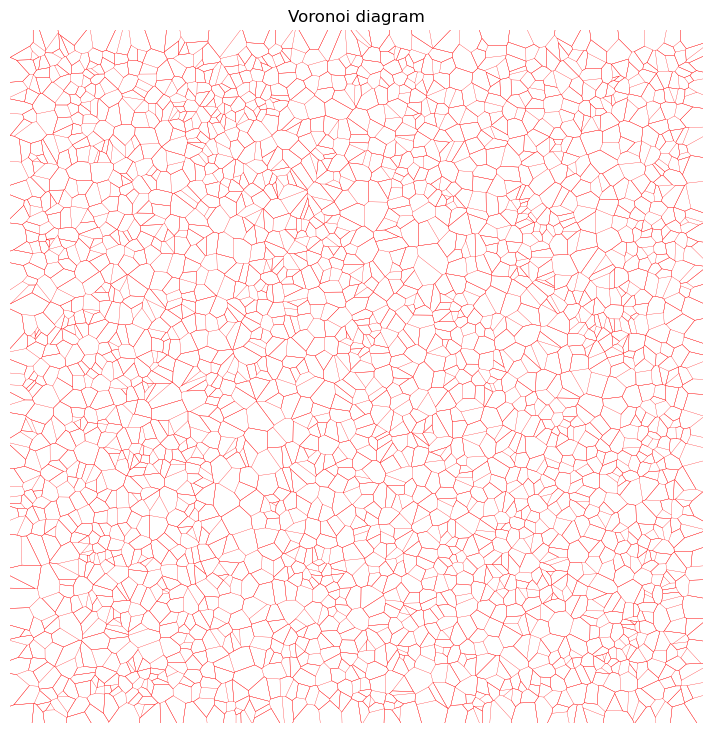

In [13]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.margins(0.1)
ax.set_aspect("equal")
plt.title("Voronoi diagram")
plt.axis([-size, 101 * size, -size, 101 * size])
plt.axis("off")

for (r, _) in vr
    # Build polygon for each region.
    polygon = rawvn[vr[r], :]
    # Plot polygon edges in red.
    plt.plot(polygon[:, 1], polygon[:, 2], color="red", linewidth=0.2)
end